### Multi classification with Logistic Regression




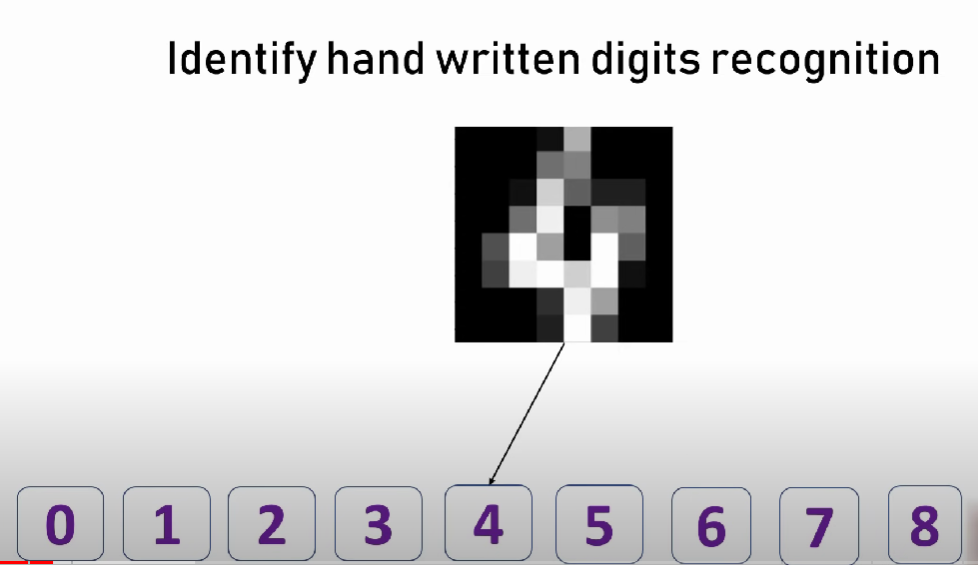

sayının hangisi olduğunu bulmaya çalışacağız.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

burada hazır oluşturulan dataseti kullanacağız. sklearn.datasets içerisinde böyle hazır olan data setlerden digits olanları kullanacağız.


Bu data sette 1797 veri bulunuyor. 8x8 boyutunda ve el ile yazılmış sayılar.


Amaç bu resimlerden sayıları belirlemek. 


In [4]:
digits= load_digits()

In [6]:
dir(digits)
# veri setinin içeriğini görüntülemek için;

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [12]:
# bu verilerden ilkini yazdıralım. yukarıdaki özelliklerden data seçilirse
digits.data[0]
# bu 8x8 matris bir dizi ancak tek boyut dizi olarak temsil edilir. 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

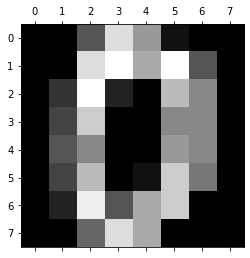

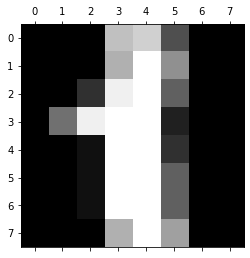

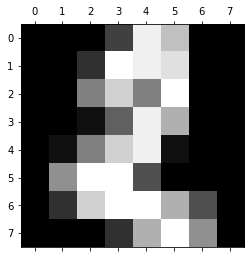

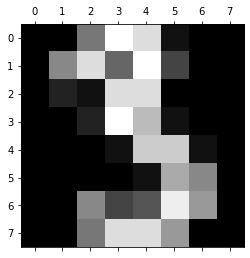

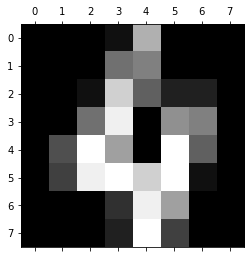

In [20]:
# bu veriyi görüntülemek için plt kullanılır. 
# aşağıdaki ifadeyle numeric dizi şeklinde olan veri görüntü şekline sahip olur.
# verinin içeriği görüntülendiğinde belirtilen image kullanılır.
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [29]:
# bu veri setinin target özelliklerine bakarsak
digits.target[0:5]
# her resmin hedefini yani değerin ne olduğunu (y değerini) söylüyor

array([0, 1, 2, 3, 4])

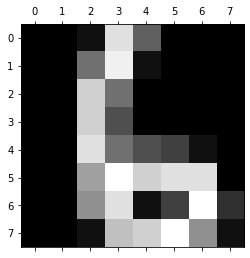

In [30]:
# Bu olayı target olayını daha iyi anlamak için;
plt.matshow(digits.images[1092])

In [28]:
digits.target[1092]

6

 Artık bunlaru veri seti kullanılarak modeli data ve taget kullanarak eğitebiliriz.

In [26]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)

In [32]:
len(x_train)

1437

In [33]:
len(x_test)

360

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model= LogisticRegression()

In [36]:
model.fit(x_train,y_train)

C:\Users\ispir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
model.score(x_test,y_test)

0.9611111111111111

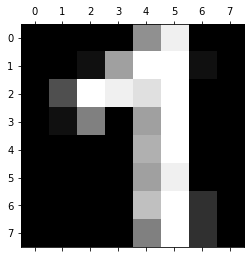

In [41]:
plt.matshow(digits.images[1426])

In [44]:
model.predict([digits.data[1426]])

array([1])

In [45]:
model.predict(digits.data[673:680])

array([7, 8, 9, 0, 9, 5, 5])

In [46]:
digits.target[673:680]

array([7, 8, 9, 0, 9, 5, 5])

In [55]:
#aldığı  0 değerlerinde rastehe değişiklikler yaptıktan sonra deniyorum.

a= [ 0.,  15.,  5., 13.,  10.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 16.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       13.,  0.,  9.,  8.,  8.,  0.,  0.,  6.,  8.,  0.,  8.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  7., 14.,  5.,
       10., 12.,  0.,  10.,  0.,  0.,  6., 14., 10.,  0.,  1.,  1.]
model.predict([a])

array([0])

Model çok iyi çalışıyor. %96 başarı oranına sahip.

Bu modelin nerede iyi çalışmadğını yani %4 kısmını bilmiyoruz.

Bunu ayrıntılı öğrenmenin en iyi yolu confusion (karışıklık) matrisidir.

In [56]:
# öncelikle x test verilerini yani predicted (tahmin) verilerini alıyoruz.
y_predicted = model.predict(x_test)

In [57]:
# confusion matrix

from sklearn.metrics import confusion_matrix

In [58]:
matrix= confusion_matrix( y_test, y_predicted)
matrix

array([[38,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  1,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 33]], dtype=int64)

Bu çıktıyı daha iyi görselleştirmek için seaborn kullanılır

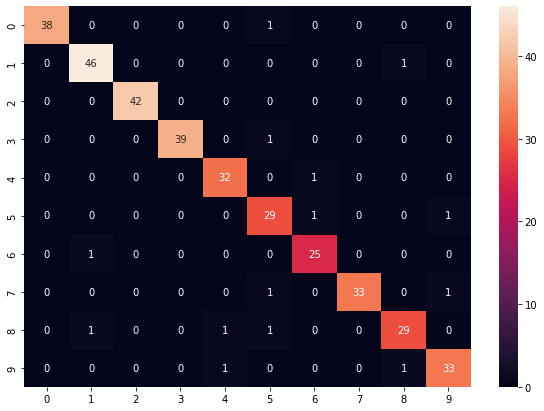

In [62]:
import seaborn as sn
#
plt.figure(figsize=(10,7))
sn.heatmap(matrix, annot=True) # görüntüleme şekli
# sıcaklık matrisi gibi denilebilir. 
plt.xlabel=('predicted')
plt.ylabel=("Truth")

Bu görselin anlamı y ekseninde bulunan 0-9 çizgileri verinin gerçek değerleri. Görseldeki sayıların karşılıkları.
Altındaki 0-9 x çizgisi ise tahmin edilen değerler.

0 için bakılırsa -> 38 tane sıfır varmış ve model bunu 38 kere 0 olduğunu tahmin etmiş.

1 için bakılırsa -> O sütun bpyunca görünen 1 değerleri 1 sayısını 1 kere 6 olarak, 1 kere de 8 olarak tahmin etmiş demek. ve 46 kere de bunu 1 olarak bilmiş.


Bu açıdan karmaşıklık matrisi modelin nasıl çalıştığını görmemizi sağlayan iyi bir yöntemdir.


# Exercise

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

* Sepal Length

* Sepal Width

* Petal Length

* Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

* Setosa
* Versicolour
* Virginica

In [63]:
from sklearn import datasets

In [65]:
iris= datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [74]:
iris.data[9]

array([4.9, 3.1, 1.5, 0.1])

In [75]:
iris.target[3]

0

In [71]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [109]:
iris.target_names[2]

'virginica'

In [105]:
iris.target[9]

0

In [112]:
y1= pd.get_dummies(iris.target_names)
y1

,setosa,versicolor,virginica
0,1,0,0
1,0,1,0
2,0,0,1


data x verileri, taget_names ise y verileri olacak ?

ancak target_names verileri sayısal veri değil. Bu yüzden bu verileri düzenlemeye çalışırsak.

In [98]:
import pandas as pd
import numpy as np

In [121]:
len(iris.target)

150

In [127]:
df2= pd.DataFrame(iris.data, columns=iris.feature_names)
df3=pd.DataFrame(iris.target, columns=["taget_names"])
birlestir=pd.concat([df2,df3],axis="columns")
birlestir.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),taget_names
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [128]:
x_eksen= df2

In [129]:
Y_eksen=df3

In [131]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [133]:
X_trains, X_tests, y_trains, y_tests = train_test_split(df2,df3, test_size=0.2)

In [140]:
X_trains

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
105,7.6,3.0,6.6,2.1
75,6.6,3.0,4.4,1.4
20,5.4,3.4,1.7,0.2
36,5.5,3.5,1.3,0.2
30,4.8,3.1,1.6,0.2
...,...,...,...,...
112,6.8,3.0,5.5,2.1
1,4.9,3.0,1.4,0.2
74,6.4,2.9,4.3,1.3
37,4.9,3.6,1.4,0.1


In [141]:
y_trains

,taget_names
105,2
75,1
20,0
36,0
30,0
...,...
112,2
1,0
74,1
37,0


In [143]:
len(X_tests)

30

In [144]:
len(y_tests)

30

In [134]:
model4.fit(X_trains, y_trains)

C:\Users\ispir\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ispir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
model4.score(X_tests, y_tests)

0.9666666666666667

In [150]:
iris.data[100]

array([6.3, 3.3, 6. , 2.5])

In [154]:
iris.target[100]

2

In [152]:
model4.predict([[6.2, 3.1, 6.2 , 2.1]])

array([2])

## Confucion matrix

In [155]:
y_pre = model4.predict(X_tests)

In [156]:
from sklearn.metrics import confusion_matrix

In [162]:
cm= confusion_matrix( y_tests, y_pre)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

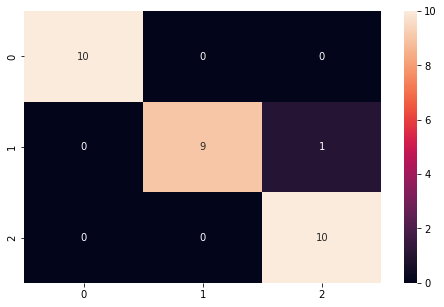

In [164]:
import seaborn as sn
#
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot=True) # görüntüleme şekli
# sıcaklık matrisi gibi denilebilir. 
plt.xlabel=('predicted')
plt.ylabel=("Truth")

## Answer

In [165]:
from sklearn.datasets import load_iris

In [166]:
iriss = load_iris()
dir(iriss)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [167]:
iriss.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [168]:
iriss.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [169]:
iriss.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [170]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iriss.data, iriss.target, test_size=0.2)

In [171]:
reg = LogisticRegression()
reg.fit(Xtrain, ytrain)

C:\Users\ispir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
reg.score(Xtest,ytest)

0.9666666666666667

In [173]:
reg.predict(iris.data[45:75])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1])

In [174]:
ypredicted=reg.predict(Xtest)

from sklearn.metrics import confusion_matrix

c = confusion_matrix(ytest, ypredicted)
c

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

TypeError: 'str' object is not callable

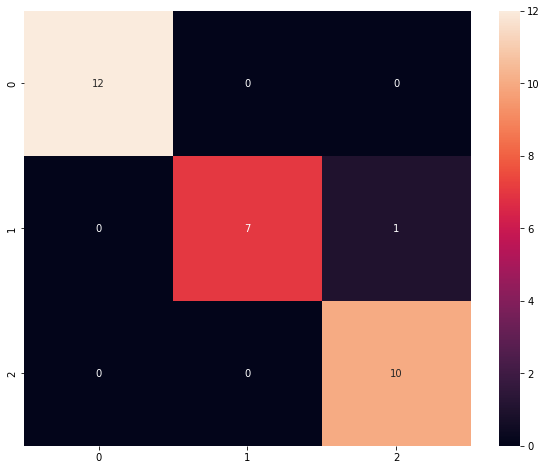

In [175]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(c, annot=True)
plt.xlabel("Tahmin")
plt.ylabel("Gerçek");

## Deneme sürecinden kalan satırlar 

In [ ]:
# dataframe1= pd.DataFrame(iris.data, columns=iris.feature_names)
# dataframe1.head()

In [ ]:
# dataframe2= pd.DataFrame(y1)
# dataframe2.head()

In [ ]:
# marged= pd.concat([dataframe1,dataframe2], axis="columns")
# marged.head()

In [72]:
# from sklearn.linear_model import LogisticRegression
# model2 = LogisticRegression()

In [88]:
# from sklearn.model_selection import train_test_split
# # X_train, X_test, Y_train, Y_test= train_test_split(iris.data, iris.taget_names, test_size=0.2)